# APS106 Week 6 Design Problem

## Wordle - Problem Background

Your good friend just introduced you to Wordle, the New York Times word-guessing game that went viral during the pandemic. As a problem-solver, this game has captivated your attention, but alas the NY Times only gives you one word a day, limiting how much you can be playing this game.

You realize that with your recent knowledge of string manipulation you know enough to be dangerous and design your own (and maybe better!) Wordle game in Python. To design this game, you will be relying on your knowledge of strings and string methods, while and for loops, and escape characters for print formatting.

Make sure your code is efficient, well-thought-out, and accounts for all possibilities so can start to Wordle as soon as possible.

Here is a link to the original Wordle game online, play here: https://www.nytimes.com/games/wordle/index.html

If you wanted to read a bit about Wordle instead, plus an infographic: https://www.cnet.com/how-to/wordle-explained-what-you-need-to-know-about-the-viral-word-game/

<div>
    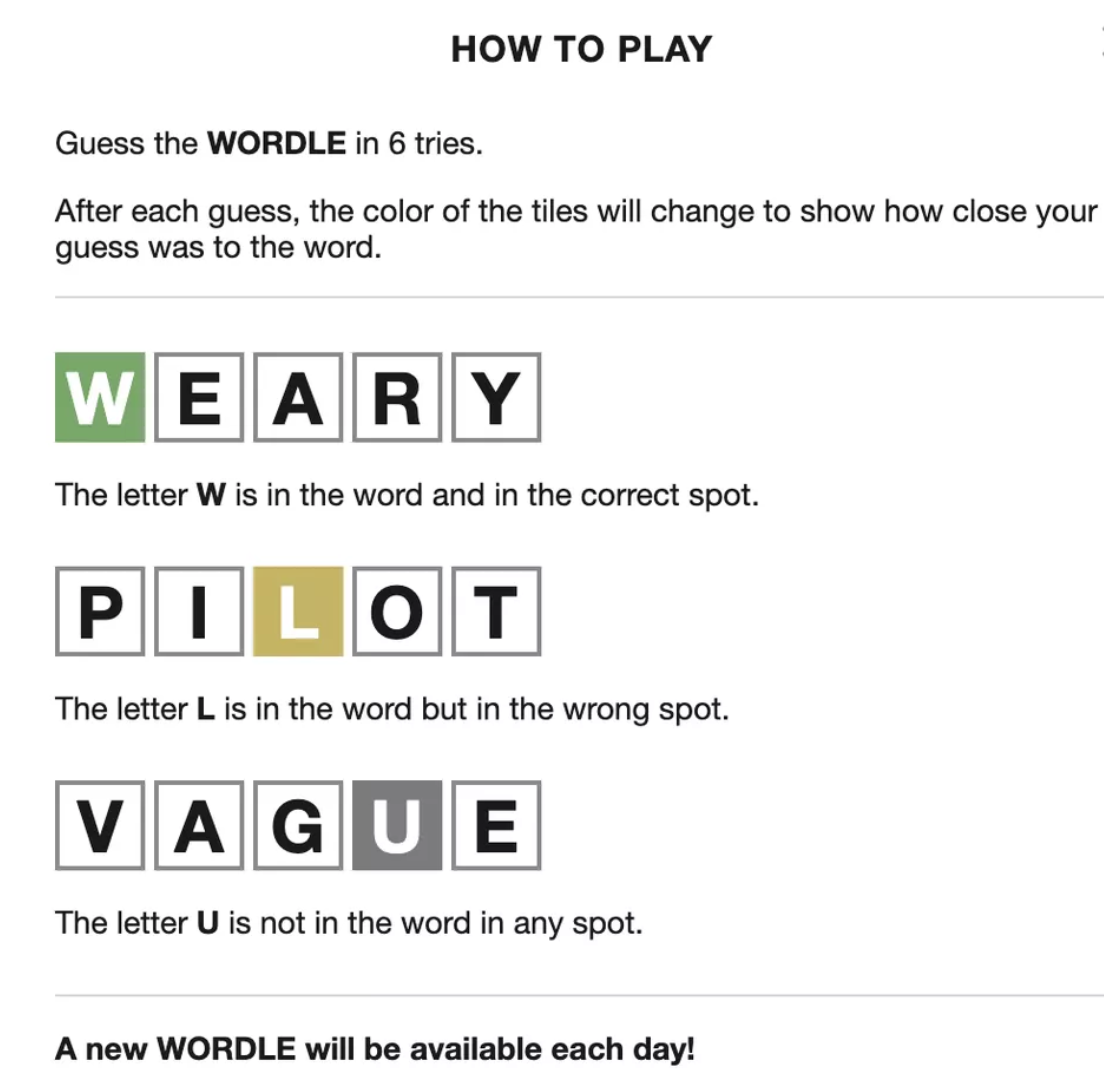
</div>

## Define the problem
This is a word guessing game relying on string inpts, where we have to have an acceptable (real, 5-letter) word which is the solution, have acceptable user guesses, allow the user up to 6 guesses, and indicate to the user the correctness of their guess by color coding the letters, based on if they are correct and in correct position (green), the correct letter in wrong position (yellow) or not in the word (grey). The final program will obey the game's rules and account for all possible scenarios to be as comprehensive as possible.

The difficult part of this programming exercise will be to define all the checks on the user input and indicating to the end user how close they are to the correct solution. To make things a bit simpler, we will be importing pyenchant library, which has a lexicon (so we don't have to worry about the solution or user guesses not being a real word). Escape characters will be used to do the color coding part of the game, but you should still consider how to make your program respond once the user gets the correct guess (i.e. if you are using a loop to check the guess each time, how could you indicate when the game should stop?).

Let's discuss some test cases.

## Define Test Cases

Firstly, using the dictionaries make sure that user input for solution and any guesses are real words, with 5 letters. Make sure to account for incorrect user inputs, by asking for a new input (and checking that one as well).

Make sure that the user gets 6 attempts to guess the word.

What happens if the user gets the word right? Does the game end or does it continue to use their remaining attempts?

Are the correct letters being color coded, and in the correct positions?

Is your string of incorrect guesses containing the correct letters?

## Generate multiple solutions
Based on what we have learned so far, our program must:
1. Use input statements to get a solution and user guesses
2. Use loops to keep track of the # of attempts 
3. Use loops to check the guess string compared to the solution string and display this result
4. Have a string keeping track of all the incorrect letters (i.e. guessed letters not in solution).
5. Finish the game if either the user has no more attempts, or the correct word is guessed

An algorithmic plan would be:
1. Get a solution and word selection from the users
2. Compare each letter of guess to the solution letters.
3. Indicate which letters are correct, which are incorrect in a clear print output to users.
4. Keep an internal score, to indicate if all 5 letters in a guess are correct.
5. Ensure attempts are tracked, as well as all incorrect letters in guesses (see final image at bottom of notebook).

What about a Programming Plan? How can we implement this efficiently and cleanly?
1. Get input from the users and store in two variables.
2. Compare inputs and compute the results. Track # of gusses and determine way to indicate 100% match between guess and solution.
3. Display output!

## Select a Solution
As the single solution looks straight-forward (since the problem is pretty easy), we can select it and proceed.

### 1. Allow User to Choose a Word to Guess
First, let's import `pyenchant`, which will allow us to check is the user's input is a real word.

In [ ]:
!pip install pyenchant #run this to install pyenchant on your IDE/JupyterHub

Next, let's let's write some code to prompt the user for some input and lower the case of their input. After this, let's check the user's input to see if its valid and if not, let's give them some feedback and ask them to input their guess again.

Let's package this code in a function called `get_solution()`.

In [ ]:
import enchant

def get_solution():
    """
    (str) -> str
    Ask the player for a 5 letter word to guess and check if its valid.
    Word must be 5 letters and must be in the dictionary.
    If word is invalid, ask them for another word
    """
    dictionary = enchant.Dict("en_US") #lexicon of English words
    
    solution = input('Give me a super secret 5-letter word: ')
    solution = solution.lower()

    while len(solution) != 5 or dictionary.check(solution) == False:
        
        """Breakout 1"""
        #Need some code here...

    return solution

### Breakout Session 1
The user has input an invalid string and we want to provide them with detailed feedback so they can input a valid solution.

The function `get_input_feedback` takes in a user's incorrect guess and prints the following:
- String longer than 5 character: `'Your word is too long!'`
- String shorter than 5 character: `'Your word is too short!'`.
- String is not a real word: `'This isn't a real word!'`. Hint: dictionary.check()

In [ ]:
import enchant

def get_input_feedback(string):
    """
    (str, enchant.Dict) -> None
    Check the string and provide feedback to the user.
    Word must be 5 letters and must be in the dictionary.
    """
    
    dictionary = enchant.Dict("en_US")
    
    #check if string or word is too long, too short, or not a real word (using the enchant.Dict method called check)
    if len(string) > 5:
        print('Your word is too long!')
    elif len(string) < 5:
        print('Your word is too short!')      
    if dictionary.check(string) == False:
        print("This isn't a real word!")

#### Test 1: 

In [ ]:
get_input_feedback('Joseph')

#### Test 2

In [ ]:
get_input_feedback('99999!!!')

Great! Now let's put it all together.

In [ ]:
import enchant

#this imported function is for clearing the output after the solution has been entered (we don't want cheaters!)
from IPython.display import clear_output

def get_solution():
    """
    (str) -> str
    Ask the player for a 5 letter word to guess and check if its valid.
    """
    dictionary = enchant.Dict("en_US") #lexicon of English words
    
    solution = input('Give me a super secret 5-letter word: ')
    solution = solution.lower()

    while len(solution) != 5 or dictionary.check(solution) == False :
        
        get_input_feedback(solution)
        solution = input('Give me a super secret 5-letter word: ')
        solution = solution.lower()
        
    #clear_output()  #clears the solution so our player can't see it
    return solution

Ok, now let's do a final test of your function `get_solution`.
#### Test 1 `'Joseph'`

In [ ]:
get_solution()

#### Test 2 `'99999!!!'`

In [ ]:
get_solution()

#### Test 3 `'Apple'`

In [ ]:
get_solution()

### 2. Allow Player to Choose a Word to Guess
The first thing we want to do is allow the user to make a guess. We wrote most of the code for this in our our `get_solution()` function. We've made a few updates to the code below, which we'll explain.

In [ ]:
import enchant

def get_guess(attempts = 6):
    """
    (int) -> str
    Takes in the number of attempts the player has left.
    Ask the player to guess a 5 letter word and check if its valid.
    Word must be 5 letters and must be in the dictionary.
    If not, asks user for another input
    Returns the lower-case version of a valid guess
    """
    dictionary = enchant.Dict("en_US") #lexicon of English words
    
    print()
    guess = input('Guess #' +str(7-attempts)+': ')
    guess = guess.lower()

    while len(guess) != 5 or dictionary.check(guess) == False :
        get_input_feedback(guess)
        guess = input('Give me a new guess: ')
        guess = guess.lower()
        
    return guess

Ok, now let's do a final test of your function `get_guess`.
#### Test 1 `'Joseph'` and multiple invalid guesses, and then a valid guess such as `'hello'`

In [ ]:
get_guess()

Ok, let's start to code up the actual game. 

Below is an example of what the output from this game looks like. Let's walk through it step by step.
<br>
<img src="sample.png" alt="drawing" width="600"/>
<br>

In [ ]:
# Get the user solution
solution = get_solution()

# Initialize some variables
attempts = 6
incorrect_letters = ""
score = 0      
        
#while they still have attempts left, and they do not have all 5 letters correct, continue to ask for a guess
while (attempts > 0 and score != 5 ):
    
    score = 0
    
    guess = get_guess(attempts)
    
    #loop through each index of our string (each letter) to determine degree correctness
    for i in range(0, len(guess)):
        
        """Breakout 2"""
        #Now we need to check their guess and determine which letters are correct!

### Breakout Session 2
Ok, we need your help writting another function. This function will be called `check_guess` and will return 3 ouputs.

In [ ]:
def check_guess(guess, solution, i):
    """
    (str, str, int) -> int, bool, str
    This function scores the user's guess and returns a color for some very fancy printing.
    
    Inputs:
    guess (str): The user's quess. e.g. "Apple"
    solution (str): The correct word. e.g. "Hello"
    i (int): The index of the current character being evaluated. For example, if i=2, the guess character is 'p'
             and the solution character is 'l'.
             
    Return one tuple that can be unpacked into the following:
    int: This is the score, which is 1 if guess[i] == solution[i] and 0 if guess[i] != solution[i], 
             i.e. if the correct letter is in the correct place
    bool: This is True is the guessed character (guess[i]) is in the solution string,
             i.e. if a correct letter is in the wrong place
          Example: True if guess[i] = 'e' and False if guess[i] = 'a'
    str: This is the color, which is green if guess[i] == solution[i], yellow if guess[i] == solution and otherwise grey.
    
    Examples:
    1, True, green = check_guess("Apple", "Andie", 0)
    1, True, green = check_guess("Apple", "Andie", 4)
    0, True, yellow = check_guess("Apple", "Hello", 4)
    0, False, grey = check_guess("Apple", "Hello", 2)
    """
    green = "\x1b[42m"
    yellow = "\x1b[43m"
    grey = "\x1b[47m"
    
    if guess[i] == solution[i]:  
        return 1, True, green
    elif guess[i] in solution:
        return 0, True, yellow
    else: 
        return 0, False, grey

#### Test 1
```python
check_guess("Apple", "Andie", 0)
>>> (1, True, '\x1b[42m')
```

In [ ]:
check_guess("Apple", "Andie", 0)

#### Test 2
```python
check_guess("Apple", "Andie", 0)
>>> (0, False, '\x1b[47m')
```

In [ ]:
check_guess("Apple", "Hello", 2)

#### Test 3
```python
check_guess("Apple", "Hello", 4)
>>> (0, True, '\x1b[43m')
```

In [ ]:
check_guess("Apple", "Hello", 4)

## What we've got so far...

In [ ]:
# Get the user solution
solution = get_solution()

# Initialize some variables
attempts = 6
incorrect_letters = ""
score = 0

#while they still have attempts left, and they do not have all 5 letters correct, continue to ask for a guess
while (attempts > 0 and score != 5 ):
    
    score = 0
    
    guess = get_guess(attempts)
    
    #loop through each index of our string (each letter) to determine degree correctness
    for i in range(0, len(guess)):
        
        points, correct_letter, color = check_guess(guess, solution, i)
        
        score += points
        
        #if letter is incorrect and not already in the string incorrect_letters
        if correct_letter == False and guess[i] not in incorrect_letters:
            incorrect_letters += guess[i]
        
        #we need to print our guess with appropriate colour, including the list of incorrect letters
        '''Breakout Session 3'''
        
        

### Breakout Session 3
Ok, we need your help writting another function. This function will be called `print_guess` and will take in several paramaters and print our game ouput (i.e. the player guess with letters with specific colours, and the incorrect letters).   Remember we want the output to look something like this:

<br>
<img src="sample.png" alt="drawing" width="600"/>
<br>

In [ ]:
def print_guess(guess, color, incorrect_letters, i):
    """
    (str, str, incorrect_letters, int) -> None
    This function will generate a very fancy printing of the user's guess and its correctness.
    
    Inputs:
    guess is the word the user guessed
    color is the colour code for correctness from the function check_guess (i.e. green, yellow, or grey)
    incorrect_letters is a string containing all unique incorrect letters so far
    i is the index of the current letter we are checking
    """

    white = "\x1b[0m"
    grey = "\x1b[47m"

    #print the current index/letter with the appropriate colour
    print(color + guess[i], end=" ")
    
    #if we are finished with our word, print the list of incorrect letters
    if i == (len(guess) - 1):
        print(white + '\t Incorrect Letters: ', end=" ")
        for j in sorted(incorrect_letters):
            print(grey + j, end=" ")
    print(white + '', end="")

# Let's put it all together!

In [ ]:
# Get the user solution
solution = get_solution()

# Initialize some variables
attempts = 6
incorrect_letters = ""
score = 0

while (attempts > 0 and score != 5 ):
    
    score = 0
    
    guess = get_guess(attempts)
    
    for i in range(0, len(guess)):
        
        points, correct_letter, color = check_guess(guess, solution, i)
        
        score += points
        
        #if letter is incorrect and not already in the string incorrect_letters
        if correct_letter == False and guess[i] not in incorrect_letters:
            incorrect_letters += guess[i]
        
        #we need to print our guess with appropriate colour, including the list of incorrect letters
        print_guess(guess, color, incorrect_letters, i)

    attempts = attempts - 1

#provide output if the score is 5 or the player runs out of attempts
if (score == 5):
    print("\nWell done! You got the word " + solution)
else:
    print("\nBetter luck next time... the answer was: " + solution)

## Let's Play!
We'll import a packaged version incase you were unable to get the game working during class.

In [88]:
from wordle import play_wordle
import enchant
from IPython.display import clear_output
dictionary = enchant.Dict("en_US") #lexicon of English words
play_wordle(dictionary)

Give me a super secret 5-letter word: kayak

Print Guess #1: kayak
k a y a k 	 Incorrect Letters:  
Well done! You got the word kayak
